# Введение в pandas

# Создание и структура Series и DataFrame

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Серия
data = ['Pandas', 'Matplotlib', 'Numpy']
sr = pd.Series(data)
sr

0        Pandas
1    Matplotlib
2         Numpy
dtype: object

In [4]:
sr = pd.Series([1.74, np.nan, 0.86, -2])
sr

0    1.74
1     NaN
2    0.86
3   -2.00
dtype: float64

In [5]:
np.random.seed(18182)
data = np.random.randint(10, size=6)
sr = pd.Series(data)
sr

0    3
1    1
2    1
3    1
4    5
5    3
dtype: int64

In [6]:
sr = pd.Series([1, -7, 2, 4], index = ['a', 'b', 'c', 'd'])
sr

a    1
b   -7
c    2
d    4
dtype: int64

In [7]:
sr.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [8]:
dct = {'zero' : 0, 'one' : 1, 'two' : 2}
sr = pd.Series(dct)
sr

zero    0
one     1
two     2
dtype: int64

In [9]:
print(sr.dtype)
print(sr.shape)
print(sr.ndim)
print(sr.size)

int64
(3,)
1
3


In [10]:
sr.to_numpy()

array([0, 1, 2])

Индексация

In [13]:
sr = pd.Series([1, -7, 2, 4, 0], index = ['a', 'b', 'c', 'd', 'e'])
sr['a']

1

In [14]:
sr['a']
sr.a

1

In [15]:
sr[1:4]

b   -7
c    2
d    4
dtype: int64

In [16]:
sr[sr>0]  #[T, False, T, T,  F]

a    1
c    2
d    4
dtype: int64

In [17]:
sr[['a','d']]

a    1
d    4
dtype: int64

In [18]:
sr['a':'d']

a    1
b   -7
c    2
d    4
dtype: int64

In [19]:
#Добавление столбца
sr['ff'] = 100
sr

a       1
b      -7
c       2
d       4
e       0
ff    100
dtype: int64

In [20]:
#Удаление столбца
print(sr.drop(labels = ['a', 'ff']))
# sr не изменился
print('\n', sr)
#sr = sr.drop(labels = ['a', 'ff'])

b   -7
c    2
d    4
e    0
dtype: int64

 a       1
b      -7
c       2
d       4
e       0
ff    100
dtype: int64


In [24]:
sr + sr
sr * sr
sr **2

a         1
b        49
c         4
d        16
e         0
ff    10000
dtype: int64

In [25]:
sr.mean()
sr.sum()
sr.max()

100

Датафрейм

In [26]:
data = [[1,2,3], [21, 22, 23], [31, 32, 33]]
df = pd.DataFrame(data)
df

,0,1,2
0,1,2,3
1,21,22,23
2,31,32,33


In [27]:
df = pd.DataFrame(data, index = ['a', 'b', 'c'], columns = ['X', 'Y', 'Z'])
df

,X,Y,Z
a,1,2,3
b,21,22,23
c,31,32,33


In [29]:
dct = {'Name': ['Jaj', 'Princi', 'Oldest'],
       'Age' : [15, 23, 31]
      }
df = pd.DataFrame(dct)
df = df.set_index('Name')
df

,Age
Name,
Jaj,15
Princi,23
Oldest,31


In [30]:
np.random.seed(18182)
data = np.random.randint(10, size=(6, 4))
# Дата Фрейм
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,3,1,1,1
1,5,3,4,7
2,0,0,9,5
3,7,0,5,4
4,9,4,7,9
5,4,8,5,9


In [31]:
print('Форма DataFrame: ', df.shape)
print('Размер DataFrame: ', df.size)

Форма DataFrame:  (6, 4)
Размер DataFrame:  24


### Сохранение и загрузка
Для сохранения DataFrame обычно используется формат csv  (Comma-Separated Values — значения, разделённые запятыми), который представляет собой текстовый файл, в котором данные записаны построчно, а значения разных столбцов разделены запятыми

In [33]:
df.to_csv('example.csv')
df2 = pd.read_csv('example.csv', index_col=0) # sep = '', delimiter = '', nrows = 10, header = None


In [6]:
df2

,a,b,c,d
0,3,1,1,1
1,5,3,4,7
2,0,0,9,5
3,7,0,5,4
4,9,4,7,9
5,4,8,5,9


Также есть возможность записи в таблицы Excel

In [35]:
df.to_excel('example.xlsx')
df2 = pd.read_excel('example.xlsx', index_col=0)

### Компоненты объектов

In [37]:
# Компоненты DataFrame
print('Названия колонок:', df.columns)
print('Названия индексов:', df.index)
df2 = df.copy()
df2.index = np.arange(df2.shape[0])
print('Названия индексов (другой вариант):', df2.index)
print('Данные:', df.values)

Названия колонок: Index(['a', 'b', 'c', 'd'], dtype='object')
Названия индексов: RangeIndex(start=0, stop=6, step=1)
Названия индексов (другой вариант): Index([0, 1, 2, 3, 4, 5], dtype='int64')
Данные: [[3 1 1 1]
 [5 3 4 7]
 [0 0 9 5]
 [7 0 5 4]
 [9 4 7 9]
 [4 8 5 9]]


In [41]:
# Каждый столбец DataFrame - Series. Аналогично строки.
sr = df['b']



0    1
1    3
2    0
3    0
4    4
5    8
Name: b, dtype: int64

In [39]:
# Компоненты Series
print('Названия индексов:', sr.index)
print('Данные:', sr.values)
print('Имя:', sr.name)

Названия индексов: RangeIndex(start=0, stop=6, step=1)
Данные: [1 3 0 0 4 8]
Имя: b


# Индексация

In [42]:
# Получение столбца
df['a']

0    3
1    5
2    0
3    7
4    9
5    4
Name: a, dtype: int64

In [43]:
# Другой вариант
df.a

0    3
1    5
2    0
3    7
4    9
5    4
Name: a, dtype: int64

In [44]:
# Несколько столбцов
df[['a', 'c']]

,a,c
0,3,1
1,5,4
2,0,9
3,7,5
4,9,7
5,4,5


In [45]:
# [[3 1 1 1]
#  [5 3 4 7]
#  [0 0 9 5]
#  [7 0 5 4]
#  [9 4 7 9]
#  [4 8 5 9]]

print('На месте (1, а):', df.loc[1])
# Доступ по меткам (строка, столбец)
print('На месте (1, а):', df.loc[1, 'a'])
# Доступ по позиции
print('На позиции (1, 0):', df.iloc[1, 0])

На месте (1, а): a    5
b    3
c    4
d    7
Name: 1, dtype: int64
На месте (1, а): 5
На позиции (1, 0): 5


In [46]:
# Срез строк
display(df[-2:])
# Срез столбцов
display(df.loc[:, 'b':'d'])

,a,b,c,d
4,9,4,7,9
5,4,8,5,9


,b,c,d
0,1,1,1
1,3,4,7
2,0,9,5
3,0,5,4
4,4,7,9
5,8,5,9


# Получение информации

In [47]:
df = pd.read_csv('wells_info.csv')
print('Форма:', df.shape)
# Вывод первых строк 
display(df.head())

Форма: (50, 17)


,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.8004
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414


In [48]:
# Типы данных
df.dtypes

API                       int64
PermitDate               object
SpudDate                 object
CompletionDate           object
FirstProductionDate      object
operatorNameIHS          object
formation                object
BasinName                object
StateName                object
CountyName               object
LatWGS84                float64
LonWGS84                float64
BottomHoleLatitude      float64
BottomHoleLongitude     float64
LATERAL_LENGTH_BLEND    float64
PROP_PER_FOOT           float64
WATER_PER_FOOT          float64
dtype: object

In [49]:
# Метод info показывает общую информацию по датафрейму и всем признакам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   API                   50 non-null     int64  
 1   PermitDate            50 non-null     object 
 2   SpudDate              50 non-null     object 
 3   CompletionDate        50 non-null     object 
 4   FirstProductionDate   50 non-null     object 
 5   operatorNameIHS       50 non-null     object 
 6   formation             50 non-null     object 
 7   BasinName             50 non-null     object 
 8   StateName             50 non-null     object 
 9   CountyName            50 non-null     object 
 10  LatWGS84              50 non-null     float64
 11  LonWGS84              50 non-null     float64
 12  BottomHoleLatitude    50 non-null     float64
 13  BottomHoleLongitude   50 non-null     float64
 14  LATERAL_LENGTH_BLEND  50 non-null     float64
 15  PROP_PER_FOOT         50 

In [50]:
# Метод describe показывает основные статистические характеристики данных по каждому числовому признаку: 
# число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили
df.describe()

,API,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2.870007e+13,41.020053,-103.060908,41.017038,-103.057664,7072.840000,792.177472,766.852853
std,1.402699e+13,6.894677,1.666861,6.892915,1.666107,2658.352101,483.828346,612.678122
min,5.005072e+12,30.891880,-104.944679,30.910100,-104.961730,1513.000000,108.332600,3.051352
25%,3.001792e+13,33.080326,-104.231566,33.084212,-104.215305,4552.250000,361.263975,356.328950
50%,3.305307e+13,40.495332,-103.243875,40.489910,-103.241330,7216.500000,740.344300,597.470900
75%,3.505925e+13,47.994497,-102.861749,47.994250,-102.829098,9590.000000,1144.937750,1095.764725
max,4.902121e+13,48.893759,-97.837858,48.866010,-97.837060,11492.000000,2053.605000,3272.875000


In [51]:
# Метод unique выводит уникальные значения
df['StateName'].unique()

array(['COLORADO', 'NEW MEXICO', 'NORTH DAKOTA', 'OKLAHOMA', 'TEXAS',
       'WYOMING'], dtype=object)

In [21]:
# Метод value_counts подсчитывает количество значений
df['StateName'].value_counts()

NORTH DAKOTA    21
COLORADO        12
TEXAS           11
OKLAHOMA         3
NEW MEXICO       2
WYOMING          1
Name: StateName, dtype: int64

# Фильтрация и сортировка

In [22]:
df_ = df[df['CountyName'] == 'WELD']
df_.head()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414
5,5123390320000,2014-02-27,2014-06-20,2014-10-30,2014-10-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.520989,-104.450861,40.52100,-104.46772,4259.0,1011.0440,698.6819


In [52]:
df[(df['CountyName'] == 'WELD') & (df['BottomHoleLatitude'] > 40.4)]

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414
5,5123390320000,2014-02-27,2014-06-20,2014-10-30,2014-10-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.520989,-104.450861,40.52100,-104.46772,4259.0,1011.0440,698.6819
10,5123409020000,2014-12-23,2015-02-07,2015-09-07,2015-09-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.482361,-104.468261,40.48424,-104.45072,4240.0,697.0967,983.0599
11,5123410480000,2015-01-21,2015-03-16,2015-04-23,2015-04-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.433139,-104.298585,40.43460,-104.28176,4294.0,896.9146,604.3947


### Сортировка

In [53]:
# Сортировка по значению
df_ = df.sort_values('LatWGS84')
df_.head()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
41,42105421500000,2014-10-07,2014-11-23,2015-03-29,2015-03-01 00:00:00.000,APPROACH OPERATING LIMITED LIABILITY CORP,WOLFCAMP,PERMIAN BASIN,TEXAS,CROCKETT,30.891880,-101.239248,30.91010,-101.23926,5946.0,1182.164,1441.9360
40,42105421020000,2014-08-16,2014-08-23,2014-12-22,2014-12-01 00:00:00.000,APPROACH OPERATING LIMITED LIABILITY CORP,WOLFCAMP,PERMIAN BASIN,TEXAS,CROCKETT,30.931085,-101.275646,30.91015,-101.27472,6853.0,1247.498,1382.3480
38,42105419830000,2014-02-27,2014-03-03,2014-06-04,2014-06-01 00:00:00.000,APPROACH OPERATING LIMITED LIABILITY CORP,WOLFCAMP,PERMIAN BASIN,TEXAS,CROCKETT,30.932566,-101.224790,30.91022,-101.22338,7330.0,1201.486,1170.3490
39,42105420060100,2014-04-10,2014-06-07,2014-08-04,2014-08-01 00:00:00.000,EP ENERGY E&P COMPANY LP,WOLFCAMP,PERMIAN BASIN,TEXAS,CROCKETT,31.036220,-101.298203,31.05840,-101.29816,7727.0,1322.021,928.1738
44,42371392130100,2014-06-27,2014-08-13,2014-12-01,2014-11-01 00:00:00.000,DIAMONDBACK EXPLORATION & PROD LLC,WOLFCAMP,PERMIAN BASIN,TEXAS,PECOS,31.103318,-103.107997,31.10177,-103.13352,7664.0,1785.731,3272.8750


In [54]:
# Сортировка по нескольким значениям значению
df_ = df.sort_values(['PermitDate', 'LatWGS84'])
df_.head()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
42,42301318440000,2012-09-13,2012-11-15,2014-01-27,2013-04-01 00:00:00.000,SHELL WESTERN E & P INCORPORATED LP,BONE SPRING,PERMIAN BASIN,TEXAS,LOVING,31.955840,-103.740776,31.94281,-103.74097,3656.0,488.5271,354.653600
45,42383381710000,2013-01-09,2013-10-23,2014-03-07,2014-02-01 00:00:00.000,SABLE PERMIAN RESOURCES LAND LLC,WOLFCAMP,PERMIAN BASIN,TEXAS,REAGAN,31.287603,-101.589564,31.25907,-101.58952,9619.0,1659.3060,1489.541000
16,33053048870100,2013-03-21,2014-08-06,2014-11-05,2014-11-01 00:00:00.000,OASIS PETROLEUM NORTH AMERICA LLC,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.995019,-103.561306,47.99470,-103.52035,9400.0,984.4741,559.110700
12,30015414470000,2013-06-07,2013-10-06,2014-01-07,2013-12-01 00:00:00.000,OXY USA INC,BONE SPRING,PERMIAN BASIN,NEW MEXICO,EDDY,32.312443,-104.030511,32.31051,-104.01594,3790.0,648.1232,477.618100
28,33105031270000,2013-07-16,2013-09-19,2014-02-10,2014-02-01 00:00:00.000,WHITING OIL & GAS CORPORATION,THREE FORKS,WILLISTON BASIN,NORTH DAKOTA,WILLIAMS,48.167886,-103.193273,48.14049,-103.18976,9211.0,366.1146,3.051352


In [55]:
# Cортировка по индексу
df_ = df.sort_index(axis=1)
df_.head()

,API,BasinName,BottomHoleLatitude,BottomHoleLongitude,CompletionDate,CountyName,FirstProductionDate,LATERAL_LENGTH_BLEND,LatWGS84,LonWGS84,PROP_PER_FOOT,PermitDate,SpudDate,StateName,WATER_PER_FOOT,formation,operatorNameIHS
0,5005072170100,DENVER BASIN,39.68445,-104.60557,2014-12-02,ARAPAHOE,2014-11-01 00:00:00.000,9005.0,39.684606,-104.642128,994.6866,2014-05-06,2014-05-06,COLORADO,591.8004,NIOBRARA,BURLINGTON RESOURCES O&G CO LP
1,5123377130000,DENVER BASIN,40.49692,-104.77859,2014-02-26,WELD,2014-02-01 00:00:00.000,4195.0,40.509320,-104.780980,991.5857,2013-07-21,2013-10-06,COLORADO,628.6321,NIOBRARA,SRC ENERGY INCORPORATED
2,5123379280000,DENVER BASIN,40.34780,-104.36863,2014-09-07,WELD,2013-11-01 00:00:00.000,4273.0,40.335390,-104.363000,1000.2760,2013-09-08,2013-09-25,COLORADO,564.4841,NIOBRARA,BONANZA CREEK ENERGY OPERATING CO LLC
3,5123379400000,DENVER BASIN,40.17445,-104.52932,2015-03-31,WELD,2015-03-01 00:00:00.000,7078.0,40.152220,-104.530780,973.4437,2013-09-11,2014-12-05,COLORADO,824.0020,NIOBRARA,NOBLE ENERGY INCORPORATED
4,5123385820100,DENVER BASIN,40.49558,-104.86757,2014-04-23,WELD,2014-04-01 00:00:00.000,3211.0,40.508303,-104.868180,783.5919,2014-01-07,2014-01-13,COLORADO,603.1414,NIOBRARA,GREAT WESTERN OPERATING COMPANY LLC


# Работа с индексом

In [56]:
# Выбор колонки для индексации
df_2 = df.set_index('API')
df_2.head()

,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
API,,,,,,,,,,,,,,,,
5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.8004
5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321
5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841
5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020
5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414


In [57]:
# Сброс индекса
df_2 = df_2.reset_index()
df_2.head()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.8004
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.6321
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.4841
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.0020
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.1414


### Multiindex

In [59]:
df_2 = df.set_index(['StateName', 'API'])
df_2.head()

PermitDate    SpudDate CompletionDate  \
StateName API                                                    
COLORADO  5005072170100  2014-05-06  2014-05-06     2014-12-02   
          5123377130000  2013-07-21  2013-10-06     2014-02-26   
          5123379280000  2013-09-08  2013-09-25     2014-09-07   
          5123379400000  2013-09-11  2014-12-05     2015-03-31   
          5123385820100  2014-01-07  2014-01-13     2014-04-23   

                             FirstProductionDate  \
StateName API                                      
COLORADO  5005072170100  2014-11-01 00:00:00.000   
          5123377130000  2014-02-01 00:00:00.000   
          5123379280000  2013-11-01 00:00:00.000   
          5123379400000  2015-03-01 00:00:00.000   
          5123385820100  2014-04-01 00:00:00.000   

                                               operatorNameIHS formation  \
StateName API                                                              
COLORADO  5005072170100         BURLINGTON RESOURCES O&G CO LP  NIOBRARA   
          5123377130000                SRC ENERGY INCORPORATED  NIOBRARA   
          5123379280000  BONANZA CREEK ENERGY OPERATING CO LLC  NIOBRARA   
          5123379400000              NOBLE ENERGY INCORPORATED  NIOBRARA   
          5123385820100    GREAT WESTERN OPERATING COMPANY LLC  NIOBRARA   

                            BasinName CountyName   LatWGS84    LonWGS84  \
StateName API                                                             
COLORADO  5005072170100  DENVER BASIN   ARAPAHOE  39.684606 -104.642128   
          5123377130000  DENVER BASIN       WELD  40.509320 -104.780980   
          5123379280000  DENVER BASIN       WELD  40.335390 -104.363000   
          5123379400000  DENVER BASIN       WELD  40.152220 -104.530780   
          5123385820100  DENVER BASIN       WELD  40.508303 -104.868180   

                         BottomHoleLatitude  BottomHoleLongitude  \
StateName API                                                      
COLORADO  5005072170100            39.68445           -104.60557   
          5123377130000            40.49692           -104.77859   
          5123379280000            40.34780           -104.36863   
          5123379400000            40.17445           -104.52932   
          5123385820100            40.49558           -104.86757   

                         LATERAL_LENGTH_BLEND  PROP_PER_FOOT  WATER_PER_FOOT  
StateName API                                                                 
COLORADO  5005072170100                9005.0       994.6866        591.8004  
          5123377130000                4195.0       991.5857        628.6321  
          5123379280000                4273.0      1000.2760        564.4841  
          5123379400000                7078.0       973.4437        824.0020  
          5123385820100                3211.0       783.5919        603.1414

In [60]:
# Индексация по первому индексу
df_2.loc['COLORADO'].shape

(12, 15)

In [61]:
# Получение строки
df_2.loc[('COLORADO', 5123377130000)]

PermitDate                           2013-07-21
SpudDate                             2013-10-06
CompletionDate                       2014-02-26
FirstProductionDate     2014-02-01 00:00:00.000
operatorNameIHS         SRC ENERGY INCORPORATED
formation                              NIOBRARA
BasinName                          DENVER BASIN
CountyName                                 WELD
LatWGS84                               40.50932
LonWGS84                             -104.78098
BottomHoleLatitude                     40.49692
BottomHoleLongitude                  -104.77859
LATERAL_LENGTH_BLEND                     4195.0
PROP_PER_FOOT                          991.5857
WATER_PER_FOOT                         628.6321
Name: (COLORADO, 5123377130000), dtype: object

In [62]:
# Получение значение в ячейке
df_2.loc[('COLORADO', 5123377130000), 'BasinName']

'DENVER BASIN'

# Некоторые возможности pandas по работе с данными

In [63]:
# Перевод времени из строк в формат np.datetime64
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'])
df['FirstProductionDate'] = pd.to_datetime(df['FirstProductionDate'])
df['PermitDate'] = pd.to_datetime(df['PermitDate'])
df['SpudDate'] = pd.to_datetime(df['SpudDate'])

df.dtypes

API                              int64
PermitDate              datetime64[ns]
SpudDate                datetime64[ns]
CompletionDate          datetime64[ns]
FirstProductionDate     datetime64[ns]
operatorNameIHS                 object
formation                       object
BasinName                       object
StateName                       object
CountyName                      object
LatWGS84                       float64
LonWGS84                       float64
BottomHoleLatitude             float64
BottomHoleLongitude            float64
LATERAL_LENGTH_BLEND           float64
PROP_PER_FOOT                  float64
WATER_PER_FOOT                 float64
dtype: object

In [64]:
df['CompletionDate'].dt.year.head()

0    2014
1    2014
2    2014
3    2015
4    2014
Name: CompletionDate, dtype: int32

In [65]:
(df['CompletionDate'] - df['FirstProductionDate']).head()

0    31 days
1    25 days
2   310 days
3    30 days
4    22 days
dtype: timedelta64[ns]

In [66]:
df.formation.unique()

array(['NIOBRARA', 'CODELL', 'BONE SPRING', 'WOLFCAMP UPPER',
       'THREE FORKS', 'BAKKEN', 'THREE FORKS / BAKKEN', 'WOODFORD',
       'OSWEGO', 'WOLFCAMP', 'SPRABERRY'], dtype=object)

In [67]:
# Построчное применение функции
def fun(row):
    if row['formation'] == 'NIOBRARA':
        return row['BasinName']
    else:
        return 'OTHER'
    
app_res = df.apply(fun, axis=1)
app_res[6:11]

6     DENVER BASIN
7     DENVER BASIN
8     DENVER BASIN
9            OTHER
10    DENVER BASIN
dtype: object

In [68]:
# Применение функции к каждому элементу столбца
map_res = df['formation'].map(lambda form: 'NIOBRARA' if form == 'NIOBRARA' else 'OTHER')
map_res[6:11]

6     NIOBRARA
7     NIOBRARA
8     NIOBRARA
9        OTHER
10    NIOBRARA
Name: formation, dtype: object

In [69]:
# Удаление колонок
df.drop('formation', axis=1).columns

Index(['API', 'PermitDate', 'SpudDate', 'CompletionDate',
       'FirstProductionDate', 'operatorNameIHS', 'BasinName', 'StateName',
       'CountyName', 'LatWGS84', 'LonWGS84', 'BottomHoleLatitude',
       'BottomHoleLongitude', 'LATERAL_LENGTH_BLEND', 'PROP_PER_FOOT',
       'WATER_PER_FOOT'],
      dtype='object')

In [70]:
df.drop(['PermitDate', 'SpudDate', 'CompletionDate', 'FirstProductionDate'], axis=1).columns

Index(['API', 'operatorNameIHS', 'formation', 'BasinName', 'StateName',
       'CountyName', 'LatWGS84', 'LonWGS84', 'BottomHoleLatitude',
       'BottomHoleLongitude', 'LATERAL_LENGTH_BLEND', 'PROP_PER_FOOT',
       'WATER_PER_FOOT'],
      dtype='object')

# Работа со строками

In [71]:
# Операции со строками в pandas находятся в наборе методов .str для Series
df['operatorNameIHS'].head()

0           BURLINGTON RESOURCES O&G CO LP
1                  SRC ENERGY INCORPORATED
2    BONANZA CREEK ENERGY OPERATING CO LLC
3                NOBLE ENERGY INCORPORATED
4      GREAT WESTERN OPERATING COMPANY LLC
Name: operatorNameIHS, dtype: object

In [72]:
df.operatorNameIHS.str.capitalize().head()

0           Burlington resources o&g co lp
1                  Src energy incorporated
2    Bonanza creek energy operating co llc
3                Noble energy incorporated
4      Great western operating company llc
Name: operatorNameIHS, dtype: object

In [73]:
df.operatorNameIHS.str.endswith('LLC').head()

0    False
1    False
2     True
3    False
4     True
Name: operatorNameIHS, dtype: bool

In [74]:
words = df.operatorNameIHS.str.split(' ')
words.head()

0            [BURLINGTON, RESOURCES, O&G, CO, LP]
1                     [SRC, ENERGY, INCORPORATED]
2    [BONANZA, CREEK, ENERGY, OPERATING, CO, LLC]
3                   [NOBLE, ENERGY, INCORPORATED]
4       [GREAT, WESTERN, OPERATING, COMPANY, LLC]
Name: operatorNameIHS, dtype: object

In [75]:
words.str[-3:].head()

0                    [O&G, CO, LP]
1      [SRC, ENERGY, INCORPORATED]
2             [OPERATING, CO, LLC]
3    [NOBLE, ENERGY, INCORPORATED]
4        [OPERATING, COMPANY, LLC]
Name: operatorNameIHS, dtype: object

In [76]:
words.str.join('_').head()

0           BURLINGTON_RESOURCES_O&G_CO_LP
1                  SRC_ENERGY_INCORPORATED
2    BONANZA_CREEK_ENERGY_OPERATING_CO_LLC
3                NOBLE_ENERGY_INCORPORATED
4      GREAT_WESTERN_OPERATING_COMPANY_LLC
Name: operatorNameIHS, dtype: object

# Группировка

In [77]:
df2 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df2

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [78]:
df2.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


In [79]:
df2.groupby(level=0).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [81]:
df.groupby('formation').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [83]:
df = pd.read_csv('wells_info.csv')
df.groupby('formation').sum()

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT
formation,,,,,,,,,,,,,,,,
BAKKEN,264500378230100,2014-09-302013-03-212013-07-292014-01-282014-0...,2015-05-042014-08-062013-09-032014-03-142014-0...,2015-09-232014-11-052014-04-272014-06-252015-0...,2015-08-01 00:00:00.0002014-11-01 00:00:00.000...,CONTINENTAL RESOURCES INCORPORATEDOASIS PETROL...,WILLISTON BASINWILLISTON BASINWILLISTON BASINW...,NORTH DAKOTANORTH DAKOTANORTH DAKOTANORTH DAKO...,DUNNMCKENZIEMCKENZIEMCKENZIEMCKENZIEMCKENZIEWI...,383.779503,-826.211111,383.87401,-826.16323,77746.0,3249.0562,3523.667500
BONE SPRING,72316732910000,2013-06-072012-09-13,2013-10-062012-11-15,2014-01-072014-01-27,2013-12-01 00:00:00.0002013-04-01 00:00:00.000,OXY USA INCSHELL WESTERN E & P INCORPORATED LP,PERMIAN BASINPERMIAN BASIN,NEW MEXICOTEXAS,EDDYLOVING,64.268282,-207.771287,64.25332,-207.75691,7446.0,1136.6503,832.271700
CODELL,54144613150000,2014-09-222013-11-13,2015-06-162014-01-10,2015-09-132014-05-19,2015-09-01 00:00:00.0002014-03-01 00:00:00.000,EXTRACTION OIL & GAS LLCSAMSON EXPLORATION LLC,DENVER BASINDENVER BASIN,COLORADOWYOMING,WELDLARAMIE,81.643497,-209.607019,81.62549,-209.62339,10225.0,2033.3650,1055.821300
NIOBRARA,56238986500200,2014-05-062013-07-212013-09-082013-09-112014-0...,2014-05-062013-10-062013-09-252014-12-052014-0...,2014-12-022014-02-262014-09-072015-03-312014-0...,2014-11-01 00:00:00.0002014-02-01 00:00:00.000...,BURLINGTON RESOURCES O&G CO LPSRC ENERGY INCOR...,DENVER BASINDENVER BASINDENVER BASINDENVER BAS...,COLORADOCOLORADOCOLORADOCOLORADOCOLORADOCOLORA...,ARAPAHOEWELDWELDWELDWELDWELDWELDWELDWELDWELDWELD,443.155587,-1150.818444,443.20514,-1150.76351,54834.0,9892.3166,8265.689900
OSWEGO,35073250300000,2014-11-26,2015-02-14,2015-08-25,2015-08-01 00:00:00.000,CHAPARRAL ENERGY LIMITED LIABILITY CORP,ANADARKO BASIN,OKLAHOMA,KINGFISHER,36.044720,-97.893227,36.03002,-97.89306,4530.0,108.3326,382.215800
SPRABERRY,84778797700000,2015-05-182014-09-17,2015-06-232014-11-07,2015-10-062015-06-07,2015-10-01 00:00:00.0002015-06-01 00:00:00.000,PIONEER NATURAL RESOURCES USA INCPIONEER NATUR...,PERMIAN BASINPERMIAN BASIN,TEXASTEXAS,MARTINUPTON,63.444591,-203.851862,63.43939,-203.85871,16381.0,2141.1980,3251.999000
THREE FORKS,396882500650200,2013-08-222014-05-152014-08-052014-08-152015-0...,2014-01-192014-11-132015-01-272015-02-252015-0...,2014-04-072015-04-032015-06-282015-08-102015-1...,2014-03-01 00:00:00.0002015-03-01 00:00:00.000...,PETRO-HUNT LLCXTO ENERGY INCORPORATEDBURLINGTO...,WILLISTON BASINWILLISTON BASINWILLISTON BASINW...,NORTH DAKOTANORTH DAKOTANORTH DAKOTANORTH DAKO...,DIVIDEMCKENZIEMCKENZIEMCKENZIEMCKENZIEMOUNTRAI...,578.020227,-1236.966751,577.77888,-1236.87868,109663.0,4332.8399,3195.467552
THREE FORKS / BAKKEN,33053056390200,2014-01-23,2014-12-18,2015-01-17,2015-01-01 00:00:00.000,NEWFIELD PRODUCTION COMPANY,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,48.067984,-103.032125,48.08104,-103.03132,1513.0,455.8970,367.239100
WOLFCAMP,337955141900200,2014-02-272014-04-102014-08-162014-10-072014-0...,2014-03-032014-06-072014-08-232014-11-232014-0...,2014-06-042014-08-042014-12-222015-03-292014-1...,2014-06-01 00:00:00.0002014-08-01 00:00:00.000...,APPROACH OPERATING LIMITED LIABILITY CORPEP EN...,PERMIAN BASINPERMIAN BASINPERMIAN BASINPERMIAN...,TEXASTEXASTEXASTEXASTEXASTEXASTEXASTEXAS,CROCKETTCROCKETTCROCKETTCROCKETTPECOSREAGANREE...,249.563405,-817.534343,249.52876,-817.55627,54685.0,11253.0580,12150.379800


### Произвольная функция

In [84]:
# Возвращается Series (строка)
def fun(df):
    out = pd.Series()
    out['MinLatitude'] = df['BottomHoleLatitude'].min()
    out['MinLongitude'] = df['BottomHoleLongitude'].min()
    return out

res = df.groupby('formation').apply(fun)
res

/tmp/ipykernel_11421/1310833717.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = df.groupby('formation').apply(fun)


,MinLatitude,MinLongitude
formation,,
BAKKEN,47.48709,-103.98625
BONE SPRING,31.94281,-104.01594
CODELL,40.35440,-104.96173
NIOBRARA,39.68445,-104.89340
OSWEGO,36.03002,-97.89306
SPRABERRY,31.24249,-102.06904
THREE FORKS,47.71838,-103.64545
THREE FORKS / BAKKEN,48.08104,-103.03132
WOLFCAMP,30.91010,-103.94402


In [85]:
# Возвращается DataFrame
def fun(df):
    df = df.copy()
    df['MinLatitude'] = df['BottomHoleLatitude'].min()
    df['MinLongitude'] = df['BottomHoleLongitude'].min()
    return df

# group_keys=False указывает, что в результате не надо добавлять formation как индекс
df2 = df.groupby('formation', group_keys=False).apply(fun)
df2.sort_index()[6:11]

/tmp/ipykernel_11421/194274973.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2 = df.groupby('formation', group_keys=False).apply(fun)


,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,MinLatitude,MinLongitude
6,5123390440000,2014-02-28,2014-04-26,2014-08-16,2014-08-01 00:00:00.000,KERR-MCGEE OIL & GAS ONSHORE LP,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.118872,-104.789372,40.13079,-104.78716,4518.0,469.8262,798.1676,39.68445,-104.89340
7,5123392690000,2014-04-14,2015-03-20,2015-08-03,2015-07-01 00:00:00.000,CRESTONE PEAK RESOURCES OPERATING LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.147015,-104.898342,40.16105,-104.89340,4975.0,1267.8870,835.9928,39.68445,-104.89340
8,5123399750000,2014-08-09,2014-11-14,2015-04-16,2015-04-01 00:00:00.000,KERR-MCGEE OIL & GAS ONSHORE LP,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.263373,-104.727955,40.27426,-104.73307,4786.0,805.9642,1133.3330,39.68445,-104.89340
9,5123402600000,2014-09-22,2015-06-16,2015-09-13,2015-09-01 00:00:00.000,EXTRACTION OIL & GAS LLC,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,40.35440,-104.96173,4195.0,926.5010,403.3223,40.35440,-104.96173
10,5123409020000,2014-12-23,2015-02-07,2015-09-07,2015-09-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.482361,-104.468261,40.48424,-104.45072,4240.0,697.0967,983.0599,39.68445,-104.89340


### Группировка по индексу

In [86]:
df2 = df.set_index(['formation', df.index])
df2.head()

API  PermitDate    SpudDate CompletionDate  \
formation                                                           
NIOBRARA  0  5005072170100  2014-05-06  2014-05-06     2014-12-02   
          1  5123377130000  2013-07-21  2013-10-06     2014-02-26   
          2  5123379280000  2013-09-08  2013-09-25     2014-09-07   
          3  5123379400000  2013-09-11  2014-12-05     2015-03-31   
          4  5123385820100  2014-01-07  2014-01-13     2014-04-23   

                 FirstProductionDate                        operatorNameIHS  \
formation                                                                     
NIOBRARA  0  2014-11-01 00:00:00.000         BURLINGTON RESOURCES O&G CO LP   
          1  2014-02-01 00:00:00.000                SRC ENERGY INCORPORATED   
          2  2013-11-01 00:00:00.000  BONANZA CREEK ENERGY OPERATING CO LLC   
          3  2015-03-01 00:00:00.000              NOBLE ENERGY INCORPORATED   
          4  2014-04-01 00:00:00.000    GREAT WESTERN OPERATING COMPANY LLC   

                BasinName StateName CountyName   LatWGS84    LonWGS84  \
formation                                                               
NIOBRARA  0  DENVER BASIN  COLORADO   ARAPAHOE  39.684606 -104.642128   
          1  DENVER BASIN  COLORADO       WELD  40.509320 -104.780980   
          2  DENVER BASIN  COLORADO       WELD  40.335390 -104.363000   
          3  DENVER BASIN  COLORADO       WELD  40.152220 -104.530780   
          4  DENVER BASIN  COLORADO       WELD  40.508303 -104.868180   

             BottomHoleLatitude  BottomHoleLongitude  LATERAL_LENGTH_BLEND  \
formation                                                                    
NIOBRARA  0            39.68445           -104.60557                9005.0   
          1            40.49692           -104.77859                4195.0   
          2            40.34780           -104.36863                4273.0   
          3            40.17445           -104.52932                7078.0   
          4            40.49558           -104.86757                3211.0   

             PROP_PER_FOOT  WATER_PER_FOOT  
formation                                   
NIOBRARA  0       994.6866        591.8004  
          1       991.5857        628.6321  
          2      1000.2760        564.4841  
          3       973.4437        824.0020  
          4       783.5919        603.1414

In [87]:
df2.groupby(level=0).mean()

TypeError: agg function failed [how->mean,dtype->object]

# Операции с несколькими DataFrame

In [96]:
df1, df2 = df.iloc[:4, :3], df.iloc[:4, 3:6]
df3, df4 = df.iloc[4:8, :3], df.iloc[4:8, 3:6]

display(df1.head())
display(df4.head())

,API,PermitDate,SpudDate
0,5005072170100,2014-05-06,2014-05-06
1,5123377130000,2013-07-21,2013-10-06
2,5123379280000,2013-09-08,2013-09-25
3,5123379400000,2013-09-11,2014-12-05


,CompletionDate,FirstProductionDate,operatorNameIHS
4,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC
5,2014-10-30,2014-10-01 00:00:00.000,NOBLE ENERGY INCORPORATED
6,2014-08-16,2014-08-01 00:00:00.000,KERR-MCGEE OIL & GAS ONSHORE LP
7,2015-08-03,2015-07-01 00:00:00.000,CRESTONE PEAK RESOURCES OPERATING LLC


In [89]:
# Объединение нескольких DataFrame
pd.concat([df1, df3])

,API,PermitDate,SpudDate
0,5005072170100,2014-05-06,2014-05-06
1,5123377130000,2013-07-21,2013-10-06
2,5123379280000,2013-09-08,2013-09-25
3,5123379400000,2013-09-11,2014-12-05
4,5123385820100,2014-01-07,2014-01-13
5,5123390320000,2014-02-27,2014-06-20
6,5123390440000,2014-02-28,2014-04-26
7,5123392690000,2014-04-14,2015-03-20


In [90]:
# Объединение происходит по умолчанию по оси 0
pd.concat([df1, df2])

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS
0,5.005072e+12,2014-05-06,2014-05-06,NaN,NaN,NaN
1,5.123377e+12,2013-07-21,2013-10-06,NaN,NaN,NaN
2,5.123379e+12,2013-09-08,2013-09-25,NaN,NaN,NaN
3,5.123379e+12,2013-09-11,2014-12-05,NaN,NaN,NaN
0,NaN,NaN,NaN,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP
1,NaN,NaN,NaN,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED
2,NaN,NaN,NaN,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC
3,NaN,NaN,NaN,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED


In [91]:
# Для объединения по столбцам нужно указать ось 1
pd.concat([df1, df2], axis=1)

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED


### Метод merge
Объединение выполняется по столбцам или индексам. При объединении столбцов в столбцах индексы DataFrame будут игнорироваться.

In [97]:
df4['API'] = df3['API']
df4 = df4.reset_index(drop=True)

In [58]:
df4

,CompletionDate,FirstProductionDate,operatorNameIHS,API
0,2014-04-23,2014-04-01,GREAT WESTERN OPERATING COMPANY LLC,5123385820100
1,2014-10-30,2014-10-01,NOBLE ENERGY INCORPORATED,5123390320000
2,2014-08-16,2014-08-01,KERR-MCGEE OIL & GAS ONSHORE LP,5123390440000
3,2015-08-03,2015-07-01,CRESTONE PEAK RESOURCES OPERATING LLC,5123392690000


In [98]:
pd.merge(df3, df4, on='API')

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS
0,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC
1,5123390320000,2014-02-27,2014-06-20,2014-10-30,2014-10-01 00:00:00.000,NOBLE ENERGY INCORPORATED
2,5123390440000,2014-02-28,2014-04-26,2014-08-16,2014-08-01 00:00:00.000,KERR-MCGEE OIL & GAS ONSHORE LP
3,5123392690000,2014-04-14,2015-03-20,2015-08-03,2015-07-01 00:00:00.000,CRESTONE PEAK RESOURCES OPERATING LLC


In [100]:
# При совпадении колонок используются указанные суффиксы
df5 = df3.copy()
df5['CompletionDate'] = df2['CompletionDate']

pd.merge(df5, df4, on='API', suffixes=('', '_from4'))

,API,PermitDate,SpudDate,CompletionDate,CompletionDate_from4,FirstProductionDate,operatorNameIHS
0,5123385820100,2014-01-07,2014-01-13,NaN,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC
1,5123390320000,2014-02-27,2014-06-20,NaN,2014-10-30,2014-10-01 00:00:00.000,NOBLE ENERGY INCORPORATED
2,5123390440000,2014-02-28,2014-04-26,NaN,2014-08-16,2014-08-01 00:00:00.000,KERR-MCGEE OIL & GAS ONSHORE LP
3,5123392690000,2014-04-14,2015-03-20,NaN,2015-08-03,2015-07-01 00:00:00.000,CRESTONE PEAK RESOURCES OPERATING LLC


# Работа с пустыми значениями

In [109]:
df = pd.read_csv('wells_info_na.csv')
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'])
df['FirstProductionDate'] = pd.to_datetime(df['FirstProductionDate'])
df

,API,CompletionDate,FirstProductionDate,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,PROP_PER_FOOT
0,5123402600000,2015-09-13,2015-09-01,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,926.5010
1,5123409020000,2015-09-07,2015-09-01,NIOBRARA,NaN,COLORADO,WELD,40.482361,-104.468261,697.0967
2,5123410480000,NaT,2015-04-01,NIOBRARA,DENVER BASIN,NaN,WELD,NaN,NaN,896.9146
3,30015414470000,2014-01-07,2013-12-01,BONE SPRING,PERMIAN BASIN,NEW MEXICO,EDDY,NaN,NaN,648.1232
4,30025425390000,2015-10-10,2015-08-01,WOLFCAMP UPPER,PERMIAN BASIN,NEW MEXICO,LEA,32.080410,-103.530040,1657.9800
5,33053048870100,2014-11-05,2014-11-01,BAKKEN,NaN,NORTH DAKOTA,MCKENZIE,47.995019,-103.561306,984.4741
6,33053051530000,2014-04-27,2014-04-01,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.992928,-103.020490,341.2530


In [102]:
# Проверка на пустоту
df.isnull()

,API,CompletionDate,FirstProductionDate,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,PROP_PER_FOOT
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,True,False,True,True,False
3,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False


In [103]:
# Отбрасывание строк с пустым значением
df.dropna()

,API,CompletionDate,FirstProductionDate,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,PROP_PER_FOOT
0,5123402600000,2015-09-13,2015-09-01,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,926.501
4,30025425390000,2015-10-10,2015-08-01,WOLFCAMP UPPER,PERMIAN BASIN,NEW MEXICO,LEA,32.080410,-103.530040,1657.980
6,33053051530000,2014-04-27,2014-04-01,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.992928,-103.020490,341.253


In [104]:
# Заполнение значением
df.fillna(0)

,API,CompletionDate,FirstProductionDate,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,PROP_PER_FOOT
0,5123402600000,2015-09-13 00:00:00,2015-09-01,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,926.5010
1,5123409020000,2015-09-07 00:00:00,2015-09-01,NIOBRARA,0,COLORADO,WELD,40.482361,-104.468261,697.0967
2,5123410480000,0,2015-04-01,NIOBRARA,DENVER BASIN,0,WELD,0.000000,0.000000,896.9146
3,30015414470000,2014-01-07 00:00:00,2013-12-01,BONE SPRING,PERMIAN BASIN,NEW MEXICO,EDDY,0.000000,0.000000,648.1232
4,30025425390000,2015-10-10 00:00:00,2015-08-01,WOLFCAMP UPPER,PERMIAN BASIN,NEW MEXICO,LEA,32.080410,-103.530040,1657.9800
5,33053048870100,2014-11-05 00:00:00,2014-11-01,BAKKEN,0,NORTH DAKOTA,MCKENZIE,47.995019,-103.561306,984.4741
6,33053051530000,2014-04-27 00:00:00,2014-04-01,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.992928,-103.020490,341.2530


In [105]:
# Заполнение прошлым значением
df.fillna(method='ffill')

/tmp/ipykernel_11421/1099210983.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,API,CompletionDate,FirstProductionDate,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,PROP_PER_FOOT
0,5123402600000,2015-09-13,2015-09-01,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,926.5010
1,5123409020000,2015-09-07,2015-09-01,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.482361,-104.468261,697.0967
2,5123410480000,2015-09-07,2015-04-01,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.482361,-104.468261,896.9146
3,30015414470000,2014-01-07,2013-12-01,BONE SPRING,PERMIAN BASIN,NEW MEXICO,EDDY,40.482361,-104.468261,648.1232
4,30025425390000,2015-10-10,2015-08-01,WOLFCAMP UPPER,PERMIAN BASIN,NEW MEXICO,LEA,32.080410,-103.530040,1657.9800
5,33053048870100,2014-11-05,2014-11-01,BAKKEN,PERMIAN BASIN,NORTH DAKOTA,MCKENZIE,47.995019,-103.561306,984.4741
6,33053051530000,2014-04-27,2014-04-01,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.992928,-103.020490,341.2530


In [106]:
# Заполнение следующим значением
df.fillna(method='bfill')

/tmp/ipykernel_11421/3517254126.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,API,CompletionDate,FirstProductionDate,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,PROP_PER_FOOT
0,5123402600000,2015-09-13,2015-09-01,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,926.5010
1,5123409020000,2015-09-07,2015-09-01,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.482361,-104.468261,697.0967
2,5123410480000,2014-01-07,2015-04-01,NIOBRARA,DENVER BASIN,NEW MEXICO,WELD,32.080410,-103.530040,896.9146
3,30015414470000,2014-01-07,2013-12-01,BONE SPRING,PERMIAN BASIN,NEW MEXICO,EDDY,32.080410,-103.530040,648.1232
4,30025425390000,2015-10-10,2015-08-01,WOLFCAMP UPPER,PERMIAN BASIN,NEW MEXICO,LEA,32.080410,-103.530040,1657.9800
5,33053048870100,2014-11-05,2014-11-01,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.995019,-103.561306,984.4741
6,33053051530000,2014-04-27,2014-04-01,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.992928,-103.020490,341.2530


In [110]:
# Заполнение определёнными значениями (из Series)
df.fillna(df.median())

TypeError: Cannot convert [['CODELL' 'NIOBRARA' 'NIOBRARA' 'BONE SPRING' 'WOLFCAMP UPPER' 'BAKKEN'
  'BAKKEN']
 ['DENVER BASIN' nan 'DENVER BASIN' 'PERMIAN BASIN' 'PERMIAN BASIN' nan
  'WILLISTON BASIN']
 ['COLORADO' 'COLORADO' nan 'NEW MEXICO' 'NEW MEXICO' 'NORTH DAKOTA'
  'NORTH DAKOTA']
 ['WELD' 'WELD' 'WELD' 'EDDY' 'LEA' 'MCKENZIE' 'MCKENZIE']] to numeric

In [111]:
df.fillna(df.mean())

TypeError: can only concatenate str (not "int") to str

# Сводные таблицы

In [112]:
# Таблица сопряженности
df = pd.read_csv('wells_info.csv')
pd.crosstab(df['formation'], df['BasinName'])

BasinName,ANADARKO BASIN,DENVER BASIN,PERMIAN BASIN,WILLISTON BASIN
formation,,,,
BAKKEN,0,0,0,8
BONE SPRING,0,0,2,0
CODELL,0,2,0,0
NIOBRARA,0,11,0,0
OSWEGO,1,0,0,0
SPRABERRY,0,0,2,0
THREE FORKS,0,0,0,12
THREE FORKS / BAKKEN,0,0,0,1
WOLFCAMP,0,0,8,0


In [113]:
# Нормализация
pd.crosstab(df['formation'], df['BasinName'], normalize=True)

BasinName,ANADARKO BASIN,DENVER BASIN,PERMIAN BASIN,WILLISTON BASIN
formation,,,,
BAKKEN,0.00,0.00,0.00,0.16
BONE SPRING,0.00,0.00,0.04,0.00
CODELL,0.00,0.04,0.00,0.00
NIOBRARA,0.00,0.22,0.00,0.00
OSWEGO,0.02,0.00,0.00,0.00
SPRABERRY,0.00,0.00,0.04,0.00
THREE FORKS,0.00,0.00,0.00,0.24
THREE FORKS / BAKKEN,0.00,0.00,0.00,0.02
WOLFCAMP,0.00,0.00,0.16,0.00


In [114]:
# Cводные таблицы
df.pivot_table(values='LatWGS84', index='formation', columns='BasinName', aggfunc='mean')

BasinName,ANADARKO BASIN,DENVER BASIN,PERMIAN BASIN,WILLISTON BASIN
formation,,,,
BAKKEN,NaN,NaN,NaN,47.972438
BONE SPRING,NaN,NaN,32.134141,NaN
CODELL,NaN,40.821749,NaN,NaN
NIOBRARA,NaN,40.286872,NaN,NaN
OSWEGO,36.044720,NaN,NaN,NaN
SPRABERRY,NaN,NaN,31.722296,NaN
THREE FORKS,NaN,NaN,NaN,48.168352
THREE FORKS / BAKKEN,NaN,NaN,NaN,48.067984
WOLFCAMP,NaN,NaN,31.195426,NaN


In [115]:
df.pivot_table(values='LatWGS84', index='formation', columns='BasinName', aggfunc='count')

BasinName,ANADARKO BASIN,DENVER BASIN,PERMIAN BASIN,WILLISTON BASIN
formation,,,,
BAKKEN,NaN,NaN,NaN,8.0
BONE SPRING,NaN,NaN,2.0,NaN
CODELL,NaN,2.0,NaN,NaN
NIOBRARA,NaN,11.0,NaN,NaN
OSWEGO,1.0,NaN,NaN,NaN
SPRABERRY,NaN,NaN,2.0,NaN
THREE FORKS,NaN,NaN,NaN,12.0
THREE FORKS / BAKKEN,NaN,NaN,NaN,1.0
WOLFCAMP,NaN,NaN,8.0,NaN


In [116]:
df.pivot_table(values=['LatWGS84', 'LonWGS84'], index='formation', aggfunc='mean')

,LatWGS84,LonWGS84
formation,,
BAKKEN,47.972438,-103.276389
BONE SPRING,32.134141,-103.885644
CODELL,40.821749,-104.803509
NIOBRARA,40.286872,-104.619859
OSWEGO,36.044720,-97.893227
SPRABERRY,31.722296,-101.925931
THREE FORKS,48.168352,-103.080563
THREE FORKS / BAKKEN,48.067984,-103.032125
WOLFCAMP,31.195426,-102.191793


In [117]:
df.pivot_table(values='LatWGS84', index='formation', columns='BasinName', aggfunc='median')

BasinName,ANADARKO BASIN,DENVER BASIN,PERMIAN BASIN,WILLISTON BASIN
formation,,,,
BAKKEN,NaN,NaN,NaN,47.920259
BONE SPRING,NaN,NaN,32.134141,NaN
CODELL,NaN,40.821749,NaN,NaN
NIOBRARA,NaN,40.335390,NaN,NaN
OSWEGO,36.044720,NaN,NaN,NaN
SPRABERRY,NaN,NaN,31.722296,NaN
THREE FORKS,NaN,NaN,NaN,48.126435
THREE FORKS / BAKKEN,NaN,NaN,NaN,48.067984
WOLFCAMP,NaN,NaN,31.069769,NaN


# Графики

In [118]:
df_prod = pd.read_csv('data/production.csv')
df_prod.head(n=6)

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate
0,5005072170100,2014,11,9783,11470,1.172442,10558,1.079219,14,2016-04-06 17:20:05.757
1,5005072170100,2014,12,24206,26476,1.093778,5719,0.236264,31,2016-04-06 17:20:05.757
2,5005072170100,2015,1,20449,26381,1.290088,2196,0.107389,31,2016-04-06 17:20:05.757
3,5005072170100,2015,2,6820,10390,1.523460,583,0.085484,28,2016-04-06 17:20:05.757
4,5005072170100,2015,3,7349,7005,0.953191,122,0.016601,13,2016-06-16 14:07:33.203
5,5005072170100,2015,4,16552,19802,1.196351,902,0.054495,30,2016-04-06 17:20:05.757


In [119]:
df_prod['API'].unique()

array([ 5005072170100,  5123377130000,  5123379280000,  5123379400000,
        5123385820100,  5123390320000,  5123390440000,  5123392690000,
        5123399750000,  5123402600000,  5123409020000,  5123410480000,
       30015414470000, 30025425390000, 33023010960000, 33025026780000,
       33053048870100, 33053051530000, 33053056390200, 33053056550000,
       33053059400000, 33053061530000, 33053061600000, 33053061970000,
       33053062710000, 33053067490000, 33061032390000, 33061033560000,
       33105031270000, 33105032030000, 33105034810000, 33105035380000,
       33105035810000, 33105036550100, 33105037690100, 35017246780000,
       35017246960000, 35073250300000, 42105419830000, 42105420060100,
       42105421020000, 42105421500000, 42301318440000, 42317401950000,
       42371392130100, 42383381710000, 42389339940000, 42389345710000,
       42461395750000, 49021210550000])

<Axes: >

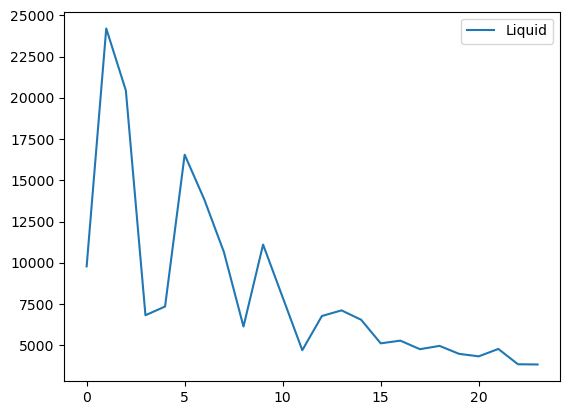

In [120]:
df_ = df_prod[df_prod['API'] == 5005072170100]
df_.plot(y='Liquid')

<Axes: >

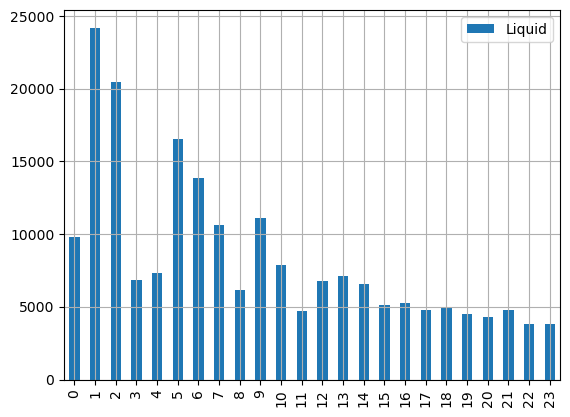

In [121]:
df_.plot(y='Liquid', kind='bar', grid=True)

<Axes: >

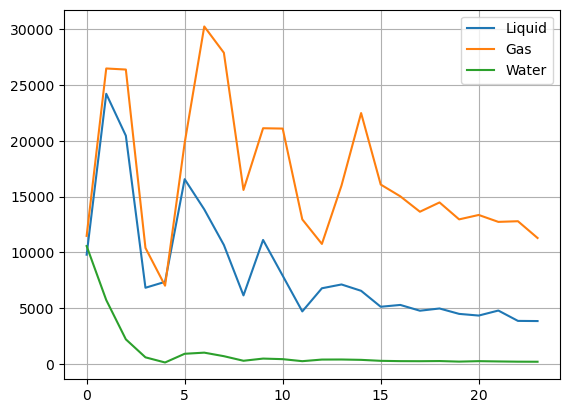

In [122]:
df_.plot(y=['Liquid', 'Gas', 'Water'], grid=True)

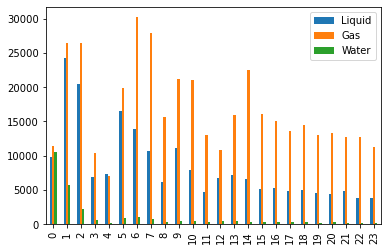

In [90]:
df_.plot(y=['Liquid', 'Gas', 'Water'], kind='bar')

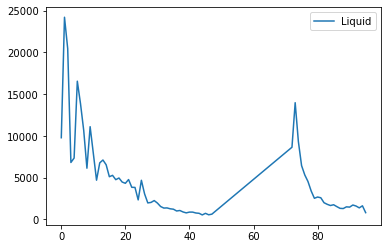

In [79]:
df_ = df_prod[df_prod['API'].isin([5005072170100, 5123377130000, 5123379400000])].copy()
df_.plot(y='Liquid')

In [80]:
df_.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 72, 73, 74,
            75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
            92, 93, 94, 95],
           dtype='int64')

API
5005072170100    AxesSubplot(0.125,0.125;0.775x0.755)
5123377130000    AxesSubplot(0.125,0.125;0.775x0.755)
5123379400000    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

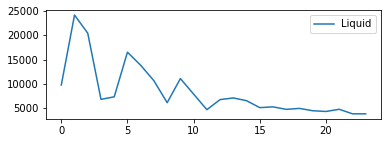

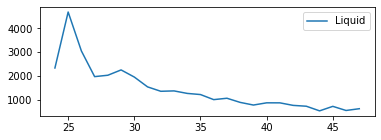

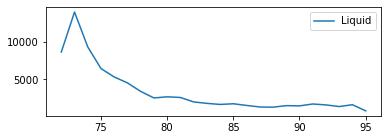

In [81]:
df_.groupby('API').plot(y='Liquid', figsize=(6, 2))

API
5005072170100    AxesSubplot(0.125,0.125;0.775x0.755)
5123377130000    AxesSubplot(0.125,0.125;0.775x0.755)
5123379400000    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

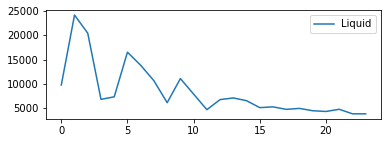

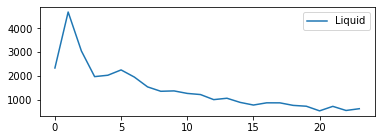

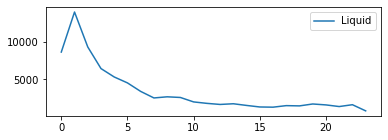

In [82]:
df_.groupby('API').plot(y='Liquid', use_index=False, figsize=(6, 2))

In [83]:
api2color = { 5005072170100: 'blue', 5123377130000: 'orange', 5123379400000: 'lightgreen' }
df_['color_API'] = df_['API'].map(api2color.get)
df_[['API', 'color_API']].drop_duplicates()

,API,color_API
0,5005072170100,blue
24,5123377130000,orange
72,5123379400000,lightgreen


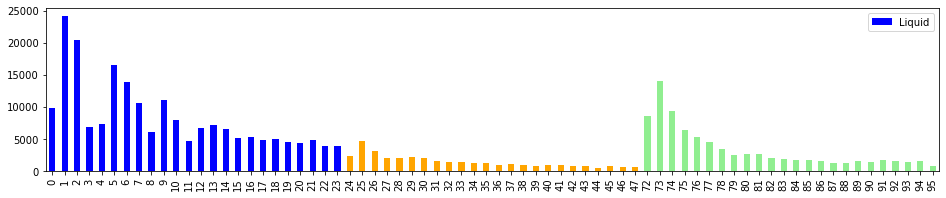

In [84]:
df_.plot(y='Liquid', kind='bar', color=df_['color_API'], figsize=(16, 3))

# Задания

1. Создайте DataFrame с 5 столбцами и 10 строками, заполненный случайными числами от 0 до 1. По каждой строке посчитайте среднее чисел, которые больше 0.3.
2. Посчитайте, сколько целых месяцев длилась добыча на каждой скважине в файле *wells_info.csv*.
3. Заполните пропущенные числовые значения медианой, а остальные самым часто встречаемым значением  в файле *wells_info_na.csv*.

In [2]:
import pandas as pd
import numpy as np

data = np.random.random(size = [10, 5])
df = pd.DataFrame(data)
df[df > 0.3].mean(axis= 1)


0    0.804016
1    0.628947
2    0.728203
3    0.609392
4    0.694795
5    0.532936
6    0.755075
7    0.799558
8    0.864422
9    0.701988
dtype: float64

In [28]:
df = pd.read_csv('data/wells_info.csv')
df['CompletionDate'] = pd.to_datetime(df['CompletionDate'])
df['FirstProductionDate'] = pd.to_datetime(df['FirstProductionDate'])


def whole_months(start_date, end_date):
    years = end_date.year - start_date.year
    months = end_date.month - start_date.month
    total_months = years * 12 + months
    return total_months


df['whole_months'] = df.apply(lambda row: whole_months(row['FirstProductionDate'], row['CompletionDate']), axis=1)


result = df[['API', 'whole_months']].set_index('API')
print(result)

                whole_months
API                         
5005072170100              1
5123377130000              0
5123379280000             10
5123379400000              0
5123385820100              0
5123390320000              0
5123390440000              0
5123392690000              1
5123399750000              0
5123402600000              0
5123409020000              0
5123410480000              0
30015414470000             1
30025425390000             2
33023010960000             1
33025026780000             1
33053048870100             0
33053051530000             0
33053056390200             0
33053056550000             0
33053059400000             1
33053061530000             0
33053061600000             1
33053061970000             0
33053062710000             1
33053067490000             0
33061032390000             0
33061033560000             0
33105031270000             0
33105032030000             0
33105034810000             1
33105035380000             0
33105035810000

In [4]:
df = pd.read_csv('data/wells_info_na.csv')

df['CompletionDate'] = pd.to_datetime(df['CompletionDate'])
df['FirstProductionDate'] = pd.to_datetime(df['FirstProductionDate'])


numeric_cols = ['LatWGS84', 'LonWGS84', 'PROP_PER_FOOT']
categorical_cols = ['API', 'CompletionDate', 'FirstProductionDate', 'formation', 'BasinName', 'StateName', 'CountyName']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

df

,API,CompletionDate,FirstProductionDate,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,PROP_PER_FOOT
0,5123402600000,2015-09-13,2015-09-01,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,926.5010
1,5123409020000,2015-09-07,2015-09-01,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.482361,-104.468261,697.0967
2,5123410480000,2014-01-07,2015-04-01,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.482361,-103.561306,896.9146
3,30015414470000,2014-01-07,2013-12-01,BONE SPRING,PERMIAN BASIN,NEW MEXICO,EDDY,40.482361,-103.561306,648.1232
4,30025425390000,2015-10-10,2015-08-01,WOLFCAMP UPPER,PERMIAN BASIN,NEW MEXICO,LEA,32.080410,-103.530040,1657.9800
5,33053048870100,2014-11-05,2014-11-01,BAKKEN,DENVER BASIN,NORTH DAKOTA,MCKENZIE,47.995019,-103.561306,984.4741
6,33053051530000,2014-04-27,2014-04-01,BAKKEN,WILLISTON BASIN,NORTH DAKOTA,MCKENZIE,47.992928,-103.020490,341.2530


# Лабораторная работа 5. Pandas.
  
Художественный фильм Титаник режиссера Джеймса Кэмерона славен тем, что идёт три часа и фильме кругом вода. В этой связи многие зрители покидают кинозал для посещения уборной.  
В некотором недалеком будущем 7D кинотеатр “ДК Академия” запускает показ ремастера фильма в формате 7D GALACTIC HD. И нанимает специалиста по обработке данных и машинному обучению, чтобы он рассчитал нагрузку на туалетные комнаты во время сеанса. Этот специалист вы! В первую очередь вам необходимо отфильтровать и должным образом подготовить данные, которые вам предоставил кинотеатр. За работу!  

<img src="images/LessonsI/Cinema7D.png" alt="Cinema7D" height=50% width=50%>

## Лабораторная 7.1
Данные, которые предоставил кинотеатр находятся в файлах *cinema_sessions.csv* и *titanic_with_labels*  
  
1. Пол (sex): отфильтровать строки, где пол не указан, преобразовать оставшиеся в число 0/1;  
2. Номер ряда в зале (row_number): заполнить вместо NAN максимальным значением ряда;  
3. Количество выпитого в литрах (liters_drunk): отфильтровать отрицательные значения и нереально большие значения (выбросы). Вместо них заполнить средним.  

In [5]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('data/titanic_with_labels.csv',index_col= 0,  sep= ' ') 
df2 = pd.read_csv('data/cinema_sessions.csv', index_col= 0, sep= ' ')
df1 = pd.merge(df1, df2, on='check_number')
df1['session_start'] = pd.to_datetime(df1['session_start'], format= 'mixed')



df1


,sex,row_number,liters_drunk,age,drink,check_number,label,session_start
0,ж,79.0,2,66,Cola,3116,0,2025-10-23 21:00:00
1,м,23.0,0,10,Fanta,8118,0,2025-10-23 15:30:00
2,M,92.0,0,18,Fanta,2264,1,2025-10-23 22:15:00
3,ж,52.0,5,67,Beerbeer,7640,1,2025-10-23 23:42:00
4,ж,57.0,2,27,Beerbeer,8764,0,2025-10-23 15:30:00
...,...,...,...,...,...,...,...,...
9995,M,96.0,5,72,Beerbeer,9554,0,2025-10-23 15:30:00
9996,-,22.0,4,45,Water,9933,0,2025-10-23 22:30:00
9997,-,89.0,4,41,Beerbeer,2905,1,2025-10-23 15:34:00
9998,Ж,26.0,0,20,Fanta,6198,1,2025-10-23 08:42:00


In [6]:
# Task1
# df1['sex'] = df1['sex'].apply(lambda x: np.nan if x == '-' or x == 'не указан' or x == 'Не указан' else x)
df1['sex'].replace(['-', 'не указан', 'Не указан'], np.nan, inplace= True)
df1['sex'] = df1['sex'].map({'м': 1, 'ж': 0, 'М' : 1, 'Ж' : 0, "Мужчина" : 1})
df1 = df1.dropna(subset=['sex'])
df1 = df1.reset_index(drop=True)
df1['sex'] = df1['sex'].astype(int)

df1



/tmp/ipykernel_8664/857664393.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['sex'].replace(['-', 'не указан', 'Не указан'], np.nan, inplace= True)


,sex,row_number,liters_drunk,age,drink,check_number,label,session_start
0,0,79.0,2,66,Cola,3116,0,2025-10-23 21:00:00
1,1,23.0,0,10,Fanta,8118,0,2025-10-23 15:30:00
2,0,52.0,5,67,Beerbeer,7640,1,2025-10-23 23:42:00
3,0,57.0,2,27,Beerbeer,8764,0,2025-10-23 15:30:00
4,1,15.0,1,44,Bugbeer,6235,0,2025-10-23 08:42:00
...,...,...,...,...,...,...,...,...
4997,0,61.0,3,50,Bugbeer,774,1,2025-10-23 23:42:00
4998,0,NaN,3,15,Water,1022,1,2025-10-23 15:00:00
4999,1,15.0,3,62,Strong beer,6510,0,2025-10-23 22:15:00
5000,0,11.0,3,52,Strong beer,9510,1,2025-10-23 22:15:00


In [10]:
#  Task2
df1['row_number'].fillna(df1['row_number'].max(), inplace= True)



/tmp/ipykernel_8664/1764831110.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['row_number'].fillna(df1['row_number'].max(), inplace= True)


In [11]:
# Task3
df1['liters_drunk'] = df1['liters_drunk'].apply(lambda x: np.nan if x < 0 else x)
df1 = df1.sort_values('liters_drunk')
q1 = df1['liters_drunk'].quantile(0.25)
q3 = df1['liters_drunk'].quantile(0.75)
iqr = q3 - q1
low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr
df1 = df1[(df1['liters_drunk'] >= low) & (df1['liters_drunk'] <= high)]
df1['liters_drunk'] = df1['liters_drunk'].fillna(df1['liters_drunk'].mean())
df1 = df1.reset_index(drop=True)
df1


,sex,row_number,liters_drunk,age,drink,check_number,label,session_start
0,0,51.0,0.0,46,Beerbeer,9725,0,2025-10-23 22:30:00
1,0,67.0,0.0,66,Water,5826,0,2025-10-23 14:00:00
2,1,44.0,0.0,76,Bugbeer,9413,1,2025-10-23 15:34:00
3,0,99.0,0.0,34,Cola,4466,0,2025-10-23 15:30:00
4,0,69.0,0.0,56,Beerbeer,3121,0,2025-10-23 06:00:00
...,...,...,...,...,...,...,...,...
4539,0,93.0,5.0,58,Fanta,984,0,2025-10-23 15:34:00
4540,1,95.0,5.0,22,Strong beer,4285,1,2025-10-23 07:30:00
4541,1,97.0,5.0,39,Beerbeer,157,1,2025-10-23 22:30:00
4542,0,17.0,5.0,77,Cola,4318,1,2025-10-23 21:00:00


In [13]:
#Task4
groups_bin = [0, 18, 50, np.inf]
labels = ['kid', 'adult', 'elderly']

df1['age_group'] = pd.cut(df1['age'], bins = groups_bin, labels= labels, include_lowest= True)

df1['age_child'] = np.where(df1['age_group'] == 'kid', df1['age'], 0)
df1['age_adult'] = np.where(df1['age_group'] == 'adult', df1['age'], 0)
df1['age_elderly'] = np.where(df1['age_group'] == 'elderly', df1['age'], 0)
df1 = df1.drop(['age', 'age_group'], axis=1)
df1


,sex,row_number,liters_drunk,drink,check_number,label,session_start,age_child,age_adult,age_elderly
0,0,51.0,0.0,1,9725,0,2025-10-23 22:30:00,0,46,0
1,0,67.0,0.0,0,5826,0,2025-10-23 14:00:00,0,0,66
2,1,44.0,0.0,1,9413,1,2025-10-23 15:34:00,0,0,76
3,0,99.0,0.0,0,4466,0,2025-10-23 15:30:00,0,34,0
4,0,69.0,0.0,1,3121,0,2025-10-23 06:00:00,0,0,56
...,...,...,...,...,...,...,...,...,...,...
4539,0,93.0,5.0,0,984,0,2025-10-23 15:34:00,0,0,58
4540,1,95.0,5.0,1,4285,1,2025-10-23 07:30:00,0,22,0
4541,1,97.0,5.0,1,157,1,2025-10-23 22:30:00,0,39,0
4542,0,17.0,5.0,0,4318,1,2025-10-23 21:00:00,0,0,77


In [14]:
#Task5
df1['drink'].unique()
df1['drink'] = df1['drink'].map({'Beerbeer': int(1), 'Water': int(0), 'Bugbeer' : int(1), 'Cola' : int(0), 'Strong beer' : int(1), 'Fanta' : int(0), 'Наше пиво' : int(1)})
df1


,sex,row_number,liters_drunk,drink,check_number,label,session_start,age_child,age_adult,age_elderly
0,0,51.0,0.0,NaN,9725,0,2025-10-23 22:30:00,0,46,0
1,0,67.0,0.0,NaN,5826,0,2025-10-23 14:00:00,0,0,66
2,1,44.0,0.0,NaN,9413,1,2025-10-23 15:34:00,0,0,76
3,0,99.0,0.0,NaN,4466,0,2025-10-23 15:30:00,0,34,0
4,0,69.0,0.0,NaN,3121,0,2025-10-23 06:00:00,0,0,56
...,...,...,...,...,...,...,...,...,...,...
4539,0,93.0,5.0,NaN,984,0,2025-10-23 15:34:00,0,0,58
4540,1,95.0,5.0,NaN,4285,1,2025-10-23 07:30:00,0,22,0
4541,1,97.0,5.0,NaN,157,1,2025-10-23 22:30:00,0,39,0
4542,0,17.0,5.0,NaN,4318,1,2025-10-23 21:00:00,0,0,77


In [ ]:
#Task6

bins = [6, 12, 20, 24]
labels = ['morning', 'day', 'evening']
# df1['session_start']
df1['session_start_group'] = pd.cut(df1['session_start'].dt.hour, bins= bins, labels= labels, include_lowest= True)
time_dummies = pd.get_dummies(df1['session_start_group'], prefix='session')
df1 = pd.concat([df1, time_dummies], axis=1)

df1 = df1.drop(['session_start_group'], axis=1)


for col in ['session_morning', 'session_day', 'session_evening']:
    df1[col] = df1[col].astype(int)

df1

,sex,row_number,liters_drunk,drink,check_number,label,session_start,age_child,age_adult,age_elderly,session_morning,session_day,session_evening
0,0,51.0,0.0,1,9725,0,2025-10-16 22:30:00,0,46,0,0,0,1
1,0,56.0,0.0,1,4965,1,2025-10-16 06:15:00,0,0,61,1,0,0
2,0,13.0,0.0,1,9704,0,2025-10-16 14:15:00,0,22,0,0,1,0
3,0,52.0,0.0,1,3031,1,2025-10-16 14:15:00,0,0,65,0,1,0
4,0,91.0,0.0,0,4362,0,2025-10-16 21:00:00,0,0,61,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,0,8.0,5.0,1,600,1,2025-10-16 14:00:00,0,29,0,0,1,0
4540,0,92.0,5.0,0,3049,0,2025-10-16 21:00:00,0,29,0,0,0,1
4541,1,76.0,5.0,0,2080,1,2025-10-16 23:42:00,0,0,56,0,0,1
4542,0,61.0,5.0,0,8281,1,2025-10-16 07:30:00,0,0,53,1,0,0


## Лабораторная 7.2
4. Возраст (age): разделить на 3 группы: дети (до 18 лет), взрослые (18 - 50), пожилые (50+). закодировать в виде трёх столбцов с префиксом age_. Старый столбец с age удалить;
5. Напиток (drink): преобразовать в число 0/1 был ли этот напиток хмельным;
6. Номер чека (check_number): надо сопоставить со второй таблицей со временем сеанса. И закодировать в виде трёх столбцов, был ли это утренний (morining) сеанс, дневной (day) или вечерний (evening).
